# GLM group maps and tables

In [1]:
# Imports
import os
from nilearn.glm import threshold_stats_img
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np
from nilearn.reporting import get_clusters_table
from nilearn.image import math_img
from mni_to_atlas import AtlasBrowser
atlas = AtlasBrowser("AAL3")

In [2]:
# Settings
#data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/'
out_dir = os.path.join(data_dir,"derivatives","nilearn_glm")
out_dir_group = os.path.join(data_dir,"derivatives","nilearn_glm","group")
group_fig_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_figures")
group_tab_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_tables")

In [3]:
contrasts_renamed = ['All',
                     'JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder',
                     'Sublimity', 'Vitality', 'Unease', 'SublimityMinusVitality', 'VitalityMinusUnease', 'UneaseMinusSublimity']

In [15]:
# Threshold values
hc = 'fdr' # None, 'bonferroni', 'fdr'
ct = 25 # cluster threshold
alpha = 0.005 # p-value threshold

In [13]:
c_idx = 0
print(contrasts_renamed[c_idx])

All


In [8]:
def my_json_view_size(params):
    """Define the size of the viewer.
    Returns: width_view, height_view

    """
    # slices_width = sagittal_width (y) + coronal_width (x) + axial_width (x)
    slices_width = params['nbSlice']['Y'] + 2 * params['nbSlice']['X']

    # slices_height = max of sagittal_height (z), coronal_height (z), and
    # axial_height (y).
    # Also add 20% extra height for annotation and margin
    slices_height = np.max([params['nbSlice']['Y'], params['nbSlice']['Z']])
    slices_height = 1.20 * slices_height

    # Get the final size of the viewer
    width_view = 800
    ratio = slices_height / slices_width
    height_view = np.ceil(ratio * width_view)

    return width_view, height_view

plotting.html_stat_map._json_view_size = my_json_view_size

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



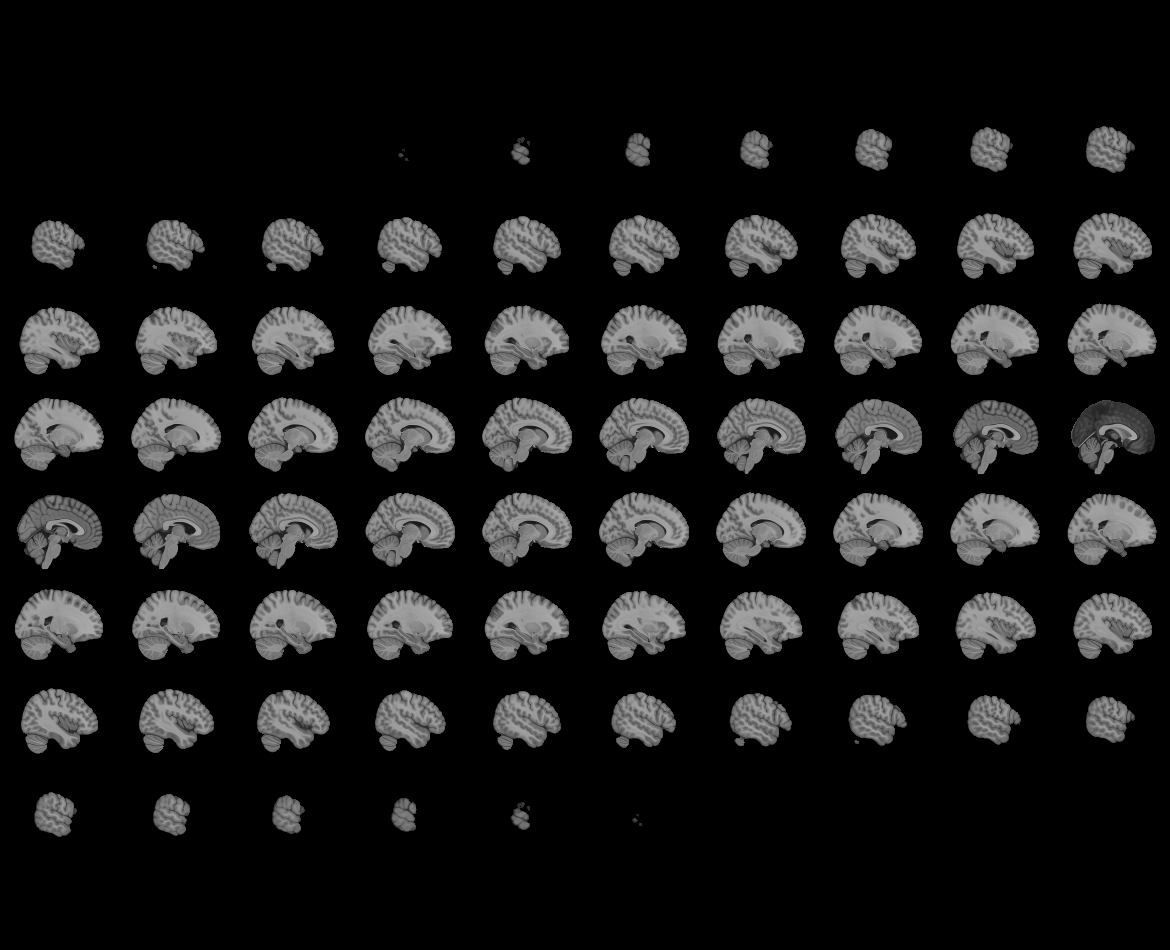
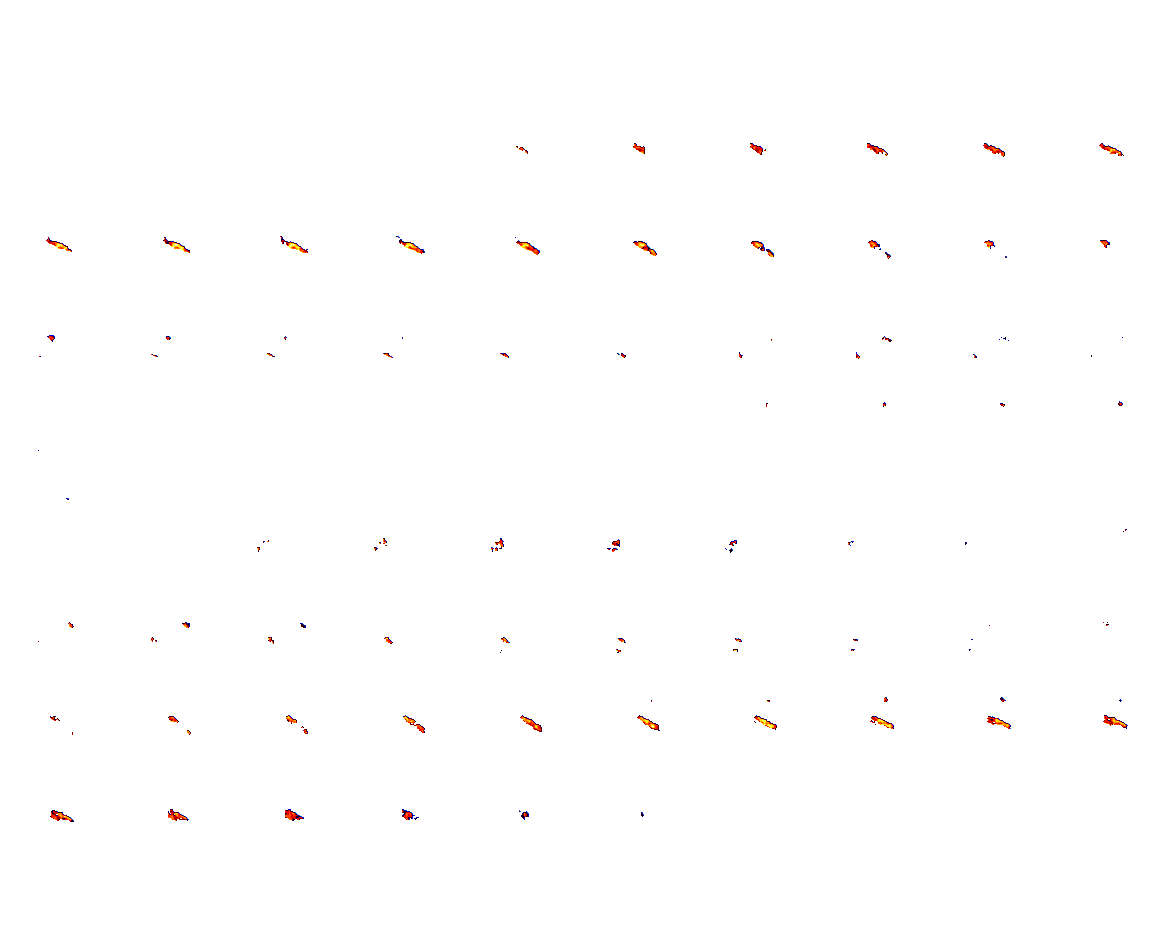

In [22]:
z_map_g = os.path.join(out_dir_group,
                       f'group_task-02a_stat-z_con-{contrasts_renamed[c_idx]}.nii.gz')

clean_map_g, threshold_g = threshold_stats_img(
    z_map_g, alpha=alpha, height_control=hc, cluster_threshold=ct
)

# threshold clean_map_g to only show positive values
clean_map_g = math_img("np.maximum(img, 0)", img=clean_map_g)

# View map interactively
plotting.view_img(clean_map_g,
         threshold=threshold_g,
         symmetric_cmap=False,
        )

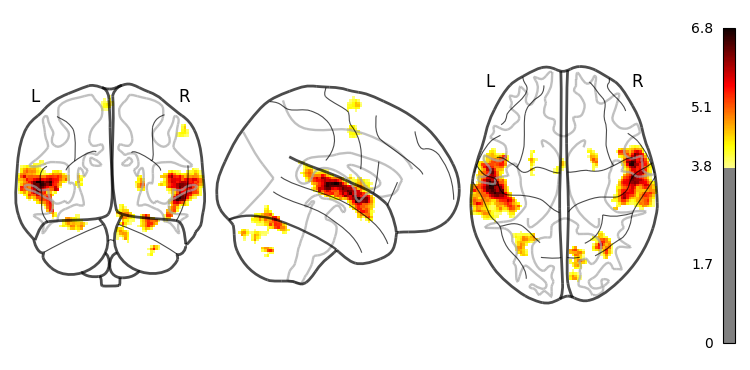

In [29]:
plotting.plot_glass_brain(clean_map_g,
                          colorbar=True,
                          cmap='cold_white_hot',
                          threshold=threshold_g)

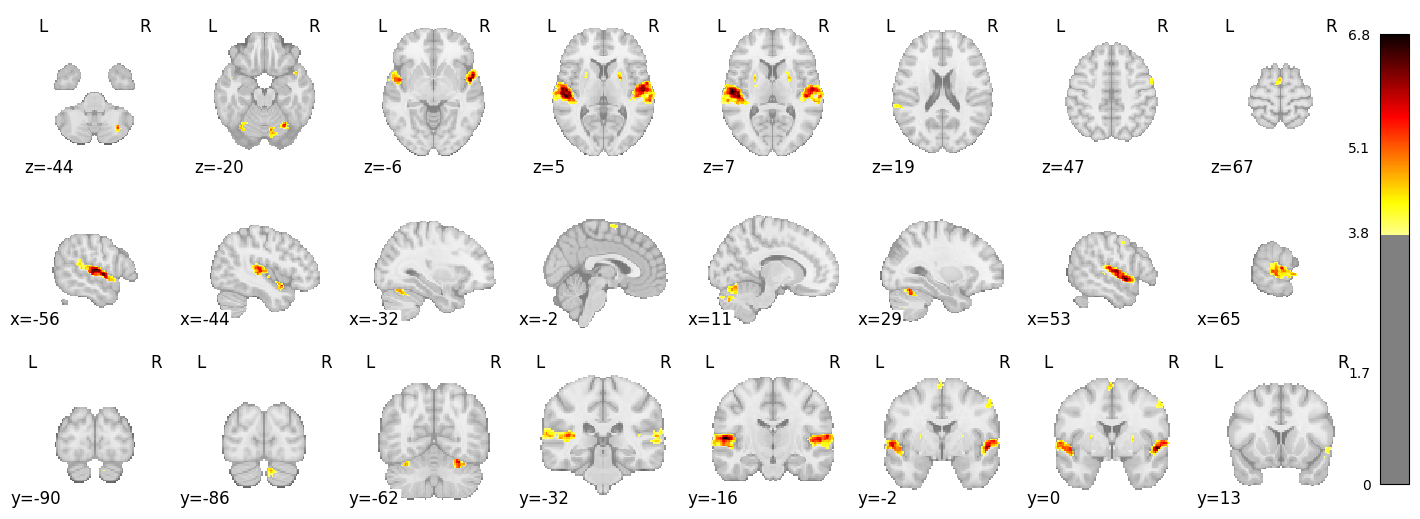

In [26]:
# beautiful mosaic figure
plotting.plot_stat_map(
    clean_map_g,
    threshold=threshold_g,
    display_mode="mosaic",
    cut_coords=8,
    colorbar=True,
    figure=plt.figure(figsize=(14, 5)),
    symmetric_cbar=False,
    cmap='cold_white_hot',
)

# Save the thresholded map figure
fig_file = os.path.join(group_fig_dir,
                        f'mosaic_stat-z_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.png')
plt.savefig(fig_file, bbox_inches='tight')

In [33]:
# Cluster table
table_g,cluster_map_g = get_clusters_table(z_map_g, threshold_g, ct,
                                return_label_maps=True)

# AAL3 labelling
coordinates = table_g[['X','Y','Z']].to_numpy()
aal_labels = atlas.find_regions(coordinates, plot=False)

# Add the labels to the table
table_g['AAL3'] = aal_labels

# Export cluster table
table_g.to_csv(os.path.join(group_tab_dir,
                          f"clusters_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.tsv"),sep='\t')
#print(table_g)
#print(table.to_latex())
table_g

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),AAL3
0,1,-54.5,-16.5,7.5,6.826518,13752,Heschl_L
1,1a,-46.5,-22.5,7.5,6.635953,,Temporal_Sup_L
2,1b,-56.5,-4.5,-0.5,6.519450,,Temporal_Sup_L
3,1c,-42.5,-28.5,1.5,5.937315,,Undefined
4,2,53.5,-0.5,-4.5,6.677911,13128,Temporal_Sup_R
5,2a,53.5,-10.5,3.5,6.376513,,Heschl_R
6,2b,55.5,5.5,-4.5,6.306984,,Temporal_Pole_Sup_R
7,2c,55.5,-8.5,-2.5,6.175832,,Temporal_Sup_R
8,3,29.5,-62.5,-20.5,5.830460,1200,Cerebellum_6_R
9,4,33.5,-66.5,-44.5,5.432368,280,Cerebellum_7b_R


In [34]:
table_g.to_clipboard()